# Loneliness and Deprivation

## Read in combined IMD and loneliness index data for England

In [2]:
import pandas as pd

In [3]:
loneliness_imd = pd.read_csv('england/loneliness_imd.csv')

In [4]:
loneliness_imd.columns

Index(['lsoa11', 'year', 'loneills', 'lsoa_code', 'lsoa_name', 'district_code',
       'district_name', 'imd_score', 'imd_rank', 'imd_decile', 'income_score',
       'income_rank', 'income_decile', 'employment_rate', 'employment_score',
       'employment_decile', 'education_score', 'education_rank',
       'education_decile', 'health_score', 'health_rank', 'health_decile',
       'crime_score', 'crime_rank', 'crime_decile', 'housing_score',
       'housing_rank', 'housing_decile', 'living_score', 'living_rank',
       'living_decile', 'poor_children_score', 'poor_children_rank',
       'poor_children_decile', 'poor_older_score', 'poor_older_rank',
       'poor_older_decile', 'young_sub_score', 'young_sub_rank',
       'young_sub_decile', 'adult_skills_sub_score', 'adult_skills_sub_rank',
       'adult_skills_sub_decile', 'geog_barriers_sub_score',
       'geog_barriers_sub_rank', 'geog_barriers_sub_decile',
       'wider_barriers_sub_score', 'wider_barriers_sub_rank',
       'wider_ba

## Visualize the joined data on a map

In [32]:
import plotly.express as px

Plotting the LSOAs on a map will need the boundary shapefiles. Try here https://geoportal.statistics.gov.uk/search?q=Lower%20Layer%20Super%20Output%20Area%20boundaries

In [36]:
import geopandas as gpd

In [61]:
lsoa_shapes = gpd.read_file('england/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Extent__BFE__EW_V3-shp/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Extent__BFE__EW_V3.shp')

In [62]:
lsoa_shapes.head()

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,E01000034,Barking and Dagenham 003A,550689,186433,0.172296,51.5567,6006.847623,513659.108139,6006.847623,"POLYGON ((550783.502 186822.004, 550783.084 18..."
1,2,E01000035,Barking and Dagenham 010A,549957,185575,0.161380,51.5491,3609.905134,397161.416611,3609.905134,"POLYGON ((550266.910 185957.709, 550269.100 18..."
2,3,E01000036,Barking and Dagenham 010B,550645,185231,0.171148,51.5459,4393.928508,418688.296730,4393.928508,"POLYGON ((549843.501 185417.140, 549850.000 18..."
3,4,E01000037,Barking and Dagenham 003B,551195,187087,0.179870,51.5624,2905.634678,233433.350609,2905.634678,"POLYGON ((551550.056 187364.705, 551528.633 18..."
4,5,E01000038,Barking and Dagenham 003C,550700,187149,0.172761,51.5631,2305.558903,214045.771782,2305.558903,"POLYGON ((550920.362 187341.138, 550921.876 18..."


In [75]:
lsoa_shapes.shape

(34753, 11)

So the geometry value seem to be based on OS Grid rather than lat-long as expected by Plotly (or to be honest most other software). Geopandas can plot the points (and LSOA shapes dataset includes a lat-long point - presumably a centroid but unsure exactly what it refers to).

This may offer a solution to convert to lat-long: https://scipython.com/book/chapter-2-the-core-python-language-i/additional-problems/converting-between-an-os-grid-reference-and-longitudelatitude/

In [64]:
geo_loneliness_imd = lsoa_shapes.merge(loneliness_imd, how='inner', left_on=['LSOA11CD'], right_on=['lsoa11'])

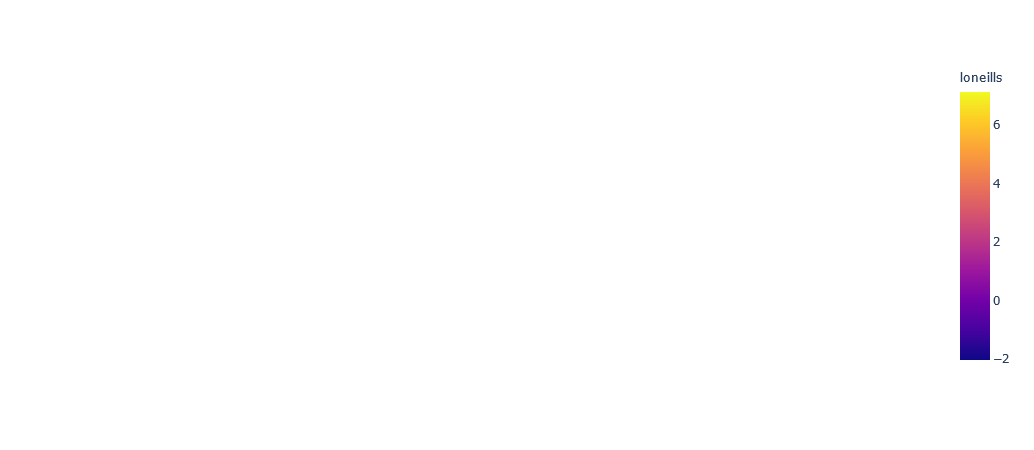

In [65]:
fig = px.choropleth(geo_loneliness_imd[0:4],
                   geojson=geo_loneliness_imd[0:4].geometry,
                   locations=geo_loneliness_imd[0:4].lsoa11,
                   color="loneills")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

<AxesSubplot:>

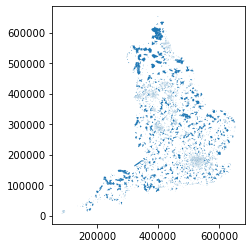

In [72]:
geo_loneliness_imd.plot()

In [76]:
geo_loneliness_imd.shape

(6271, 71)

From this it is clear that we are missing data for several LSOAs (but appear to have pretty reasonable coverage across England as a whole)